<a href="https://colab.research.google.com/github/SAB-6/UK_House_Price_Prediction/blob/master/UK_house_prediction_deepnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UK house price prediction_Deep Neural Network
#### Data Source: HM Land Registry Price Paid Data <a href="https://data.gov.uk/dataset/4c9b7641-cf73-4fd9-869a-4bfeed6d440e/hm-land-registry-price-paid-data">Link<a/>

_Author **Shereef Bankole**_
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/">Here<a/>
<br/> **Github click**  <a href="https://github.com/SAB-6">Here<a/>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Import Dependecies

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from tensorflow.keras import layers

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

TensorFlow 2.x selected.


In [0]:
train_set = pd.read_csv(os.path.join ('.', 'drive', 'My Drive', 'train_set.csv'))
test_set = pd.read_csv(os.path.join ('.', 'drive', 'My Drive', 'test_set.csv'))
print('Train_set:\n{}\n\n'.format(train_set))
print('Test_set:\n{}\n\n'.format(test_set))

Train_set:
          Unnamed: 0   Price  Semi-Detached  ...      Year     Month       Day
0                  0  185000            0.0  ...  1.655193 -0.529253 -1.556376
1                  1  125000            0.0  ...  1.513569 -1.731030 -0.561834
2                  2   45000            0.0  ... -0.752405  0.071636  0.985230
3                  3  117500            0.0  ... -0.044288  0.071636 -1.114357
4                  4   78000            1.0  ... -1.177275 -0.829697  0.543211
...              ...     ...            ...  ...       ...       ...       ...
17274714    17274716  249000            1.0  ... -0.044288 -0.228808  0.653716
17274715    17274717  255000            1.0  ...  1.371946 -1.130141  0.764221
17274716    17274718  270000            0.0  ...  1.655193 -1.130141 -1.335367
17274717    17274719  445000            1.0  ...  0.380582  0.672525  0.874725
17274718    17274720  145500            0.0  ...  1.655193  1.273414 -0.119816

[17274719 rows x 22 columns]


Test_set:

In [0]:
#setting number of rows and columns display in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
train_features = train_set[['Semi-Detached','Detached',	'Flats/Mas', 'Terraced','Others','New',	'Old','Freehold',	'Leasehold','Others','Latitude','Longitude','City_mean','City_max','City_min','City_std','City_median','Year','Month','Day']]
train_target = train_set['Price']
test_features= test_set[['Semi-Detached','Detached',	'Flats/Mas', 'Terraced','Others','New',	'Old','Freehold',	'Leasehold','Others','Latitude','Longitude','City_mean','City_max','City_min','City_std','City_median','Year','Month','Day']]
test_target = test_set['Price']
input_shape =train_features.shape[1:]
scaler =StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

## Sequential API

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
#tf_=pd.DataFrame(test_features)
#tf_.isna().sum().sort_values(ascending=False)

In [0]:
#tf_.head()

In [0]:
#tf_.dtypes

In [0]:
#hist.plot("loss", "epoch", label = "loss")

In [0]:
model = keras.Sequential([
        layers.Dense(200, activation='relu', input_shape= input_shape),
        layers.Dense(150, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(80, activation='relu'),
        layers.Dense(1)
        ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss=keras.losses.Huber(), optimizer=optimizer, metrics =['mae'])

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 200)               4200      
_________________________________________________________________
dense_37 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_38 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_39 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_40 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 81        
Total params: 67,711
Trainable params: 67,711
Non-trainable params: 0
__________________________________________________

In [0]:
history = model.fit(train_features, train_target, batch_size = 600, epochs = 50, validation_split = 0.30)

Train on 12092303 samples, validate on 5182416 samples
Epoch 1/50
12092303/12092303 [==============================] - 118s 10us/sample - loss: 70003.3551 - mae: 70003.6719 - val_loss: 69151.1927 - val_mae: 69151.6562
Epoch 2/50
12092303/12092303 [==============================] - 116s 10us/sample - loss: 68684.2117 - mae: 68684.4531 - val_loss: 68694.2200 - val_mae: 68694.7656
Epoch 3/50
12092303/12092303 [==============================] - 115s 10us/sample - loss: 68330.3750 - mae: 68330.8438 - val_loss: 68640.0169 - val_mae: 68640.5312
Epoch 4/50
12092303/12092303 [==============================] - 116s 10us/sample - loss: 68003.5710 - mae: 68003.8281 - val_loss: 68236.0956 - val_mae: 68236.4609
Epoch 5/50
12092303/12092303 [==============================] - 117s 10us/sample - loss: 67699.5610 - mae: 67699.9453 - val_loss: 67790.1420 - val_mae: 67790.4922
Epoch 6/50
12092303/12092303 [==============================] - 117s 10us/sample - loss: 67416.0605 - mae: 67416.6250 - val_loss: 

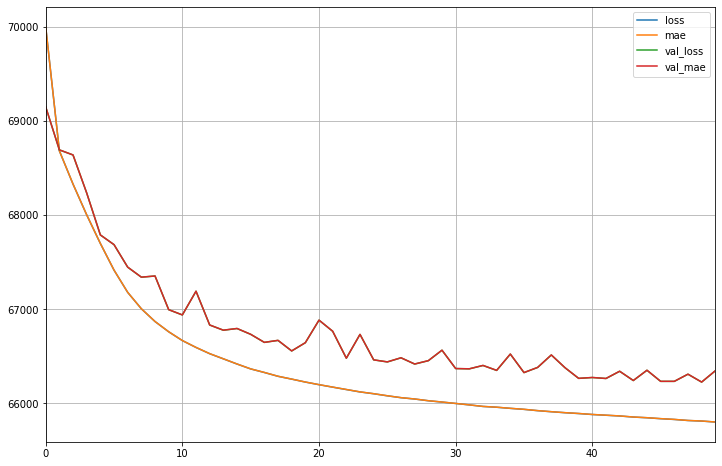

In [0]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca()

### Functional API

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_ = keras.layers.Input(shape=input_shape)
hidden1 = keras.layers.Dense(200, activation="relu")(input_)
hidden2 = keras.layers.Dense(150, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(100,activation="relu")(hidden2)
hidden4 = keras.layers.Dense(100,activation="relu")(hidden3)
concat = keras.layers.concatenate([input_, hidden4])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [0]:
model.compile(loss = keras.losses.Huber(), optimizer= keras.optimizers.RMSprop(lr=0.001), metrics =['mae'])
history = model.fit(train_features, train_target, batch_size = 1000, epochs = 50, validation_split = 0.30)

Train on 12092303 samples, validate on 5182416 samples
Epoch 1/50
12092303/12092303 [==============================] - 73s 6us/sample - loss: 71312.0927 - mae: 71312.7500 - val_loss: 69521.1197 - val_mae: 69521.5312
Epoch 2/50
12092303/12092303 [==============================] - 71s 6us/sample - loss: 68827.5228 - mae: 68828.2891 - val_loss: 69087.1787 - val_mae: 69087.5469
Epoch 3/50
12092303/12092303 [==============================] - 71s 6us/sample - loss: 68562.0541 - mae: 68562.8203 - val_loss: 69008.9126 - val_mae: 69009.5859
Epoch 4/50
12092303/12092303 [==============================] - 71s 6us/sample - loss: 68417.3374 - mae: 68417.8125 - val_loss: 68808.8201 - val_mae: 68809.3438
Epoch 5/50
12092303/12092303 [==============================] - 72s 6us/sample - loss: 68310.5707 - mae: 68310.9922 - val_loss: 68535.2168 - val_mae: 68535.6562
Epoch 6/50
12092303/12092303 [==============================] - 71s 6us/sample - loss: 68213.1185 - mae: 68213.3672 - val_loss: 68704.8147 -

In [0]:
#plt.plot(pd.DataFrame(history.history))
#plt.grid(True)
#plt.gca().set_ylim(0,1)
#plt.show()

### Hyperparameter Tuning

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)